矢量化加速

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import math
import numpy as np
import torch

In [6]:
n = 10000
a = torch.ones(n)
b = torch.ones(n) 

In [8]:
class Timer:
    #记录多次运行的时间
    def __init__(self):
        self.times = []
        self.start()
        
    def start(self):
        self.start_time = time.time()
        
    def stop(self):
        self.times.append(time.time() - self.start_time)
        return self.times[-1]
    
    def avg(self):
        return sum(self.times)/len(self.times)
    
    def sum(self):
        return sum(self.times)
    
    def cumsum(self):
        return np.array(self.times).cumsum().tolist()

In [9]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
'%.5f sec' % timer.stop()

'0.05669 sec'

In [10]:
timer.start()
d = a + b
'%.5f sec' % timer.stop()

'0.00027 sec'

正态分布与平方损失

In [12]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

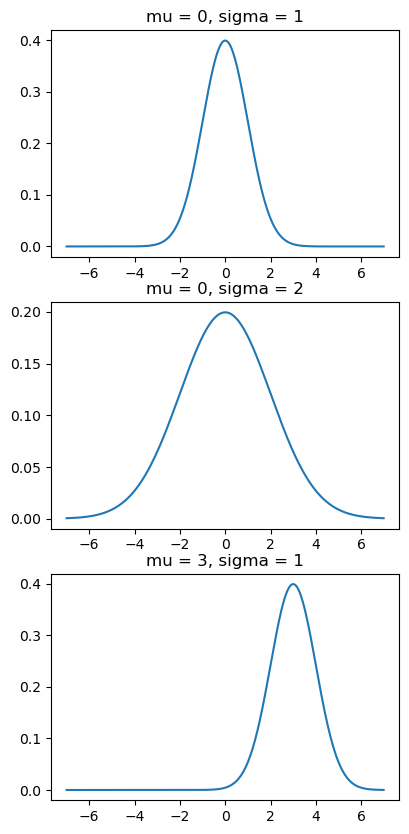

In [13]:
x = np.arange(-7, 7, 0.01)
params = [(0, 1), (0, 2), (3, 1)]
timer.start()
fig, axes = plt.subplots(3, 1, figsize=(4.5, 10))
for i in range(3):
    mu, sigma = params[i]
    axes[i].plot(x, normal(x, mu, sigma))
    axes[i].set_title('mu = %d, sigma = %d' % (mu, sigma))
plt.show()